**Part 1. Topic Classification**

**Answer-1**: As per the dataset and Jupyter Notebook Given in the Tutorial, To address the simplifications in the Jupyter notebook using the 20 newsgroups dataset (categories: 'rec.autos', 'sci.med', 'comp.graphics'), I will make two changes. First, I will adjust the regex in the preprocess_text function from re.sub(r'[^\w\s]', '', text) to re.sub(r'[^a-zA-Z0-9\s\-.+/]', '', text) to retain special characters like '-', '/', '.', and '+' that are significant in technical terms (e.g., "C++", "HIV-positive") within the dataset. Second, I will replace the single train-test split (80% train, 20% test) with 5-fold cross-validation using scikit-learn’s cross_validate in a pipeline with TfidfVectorizer and BernoulliNB. This ensures robust evaluation of the model’s performance across the dataset by properly handling feature extraction within each fold. These updates will enhance text preprocessing and model assessment for the given categories.

**Answer-1 (According to the given music data for the assignment):** Kindly Refer to the code below:
Answer-1 (Specific to this data): *The regex was modified to re.sub(r'[^a-zA-Z0-9\s\-.+/]', '', text) to preserve special characters like hyphens (e.g., in artist names such as "AC/DC"), slashes (e.g., in dates like "2023/05/15"), and periods, which are relevant to song metadata, ensuring the text retains its contextual meaning. Instead of a single train-test split, I used 5-fold cross-validation via cross_validate to evaluate the BernoulliNB, MultinomialNB, and SVC models. This provides a more reliable performance assessment across the entire dataset.*


In [2]:
import pandas as pd
import re
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Read the TSV file containing song data
df = pd.read_csv('/content/dataset.tsv', sep='\t')
df = df.dropna().drop_duplicates()

# Combine fields into a single document per song
df['document'] = df['artist_name'] + ' ' + df['track_name'] + ' ' + df['release_date'].astype(str) + ' ' + df['genre'] + ' ' + df['lyrics']

# Preprocessing function with adjusted regex to retain meaningful characters
def preprocess_text(text):
    text = text.lower()
    # Keep alphanumeric characters, spaces, and specific special characters: -, ., /, +
    text = re.sub(r'[^a-zA-Z0-9\s\-.+/]', '', text)
    return text

# Apply preprocessing to documents
df['document'] = df['document'].apply(preprocess_text)

# Define features and labels
X = df['document']
y = df['topic']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Define classifiers for evaluation
models = {
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),
    'SVC': SVC(kernel='linear')
}

# Define evaluation metrics for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Evaluate each model using 5-fold cross-validation
for name, model in models.items():
    print(f"Evaluating {name} with 5-fold cross-validation")
    pipeline = Pipeline([
        ('tfidf', vectorizer),
        ('clf', model)
    ])
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)
    print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
    print(f"Precision: {cv_results['test_precision'].mean():.4f}")
    print(f"Recall: {cv_results['test_recall'].mean():.4f}")
    print(f"F1-score: {cv_results['test_f1'].mean():.4f}")
    print()

Evaluating BernoulliNB with 5-fold cross-validation


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Accuracy: 0.5385
Precision: 0.3557
Recall: 0.3850
F1-score: 0.3372

Evaluating MultinomialNB with 5-fold cross-validation


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Accuracy: 0.6365
Precision: 0.4350
Recall: 0.4542
F1-score: 0.4203

Evaluating SVC with 5-fold cross-validation
Accuracy: 0.8588
Precision: 0.8706
Recall: 0.8050
F1-score: 0.8295



**PART-1, ANSWER-(2):** To address the task, I developed a Multinomial Naive Bayes (MNB) model alongside a Bernoulli Naive Bayes (BNB) model to classify songs into one of five topics (dark, emotion, lifestyle, personal, sadness) using a dataset of 1500 songs with fields: artist_name, track_name, release_date, genre, lyrics, and topic. The goal was to identify text preprocessing steps that maximize classification accuracy using default classifier settings and scikit-learn’s CountVectorizer with standard settings (adjusted only for stopwords and binary=True for BNB). I concatenated the five feature fields into a single document per song, ensuring all fields were converted to strings to avoid type errors. I tested three preprocessing configurations: (1) Basic: lowercasing and removing non-letter characters (keeping only letters and spaces via regex [^a-z ]); (2) Stem: basic preprocessing plus Porter stemming to reduce words to their root form (e.g., "running" to "run"); (3) Lemma: basic preprocessing plus WordNet lemmatization to reduce words to their base form (e.g., "better" to "good"). Stopwords were removed using scikit-learn’s English stopword list within CountVectorizer, and a “word” was defined by CountVectorizer’s default tokenization (sequences of letters after preprocessing). I evaluated each configuration using accuracy on a 20% test split (random_state=42).

**The results showed: Basic (MNB: 0.7933, BNB: 0.5333), Stem (MNB: 0.8100, BNB: 0.5467), Lemma (MNB: 0.8000, BNB: 0.5433). The Stem configuration yielded the highest MNB accuracy (0.8100), indicating that stemming, combined with lowercasing, special character removal, and stopword filtering, best captures the features relevant for topic classification in this dataset.**

*While BNB accuracy was lower across all configurations, stemming also improved its performance slightly. Thus, the best preprocessing steps, to be used for the rest of the assignment, are: (1) Lowercasing to standardize text; (2) Removing special characters (non-letters) before tokenization using regex; (3) Stemming with PorterStemmer to normalize words; and (4) Stopword removal using scikit-learn’s English stopwords.*

In [5]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Load the dataset (adjust the file name/path as needed)
df = pd.read_csv('/content/dataset.tsv', sep='\t')

# Create the 'document' column by concatenating columns, ensuring all are strings
df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

# Define features (X) and target (y)
X = df['document']
y = df['topic']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    return text

# Define preprocessing functions
def preprocess_basic(text):
    return clean_text(text)

def preprocess_stem(text):
    text = clean_text(text)
    words = text.split()
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

def preprocess_lemma(text):
    text = clean_text(text)
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

# List of preprocessors to test
preprocessors = [
    ('basic', preprocess_basic),
    ('stem', preprocess_stem),
    ('lemma', preprocess_lemma)
]

# Evaluate each preprocessing configuration
for name, func in preprocessors:
    preprocessed_X_train = X_train.apply(func)
    preprocessed_X_test = X_test.apply(func)

    # Multinomial Naive Bayes
    vectorizer_mnb = CountVectorizer(stop_words='english')
    X_train_mnb = vectorizer_mnb.fit_transform(preprocessed_X_train)
    X_test_mnb = vectorizer_mnb.transform(preprocessed_X_test)
    mnb = MultinomialNB()
    mnb.fit(X_train_mnb, y_train)
    y_pred_mnb = mnb.predict(X_test_mnb)
    acc_mnb = accuracy_score(y_test, y_pred_mnb)

    # Bernoulli Naive Bayes
    vectorizer_bnb = CountVectorizer(stop_words='english', binary=True)
    X_train_bnb = vectorizer_bnb.fit_transform(preprocessed_X_train)
    X_test_bnb = vectorizer_bnb.transform(preprocessed_X_test)
    bnb = BernoulliNB()
    bnb.fit(X_train_bnb, y_train)
    y_pred_bnb = bnb.predict(X_test_bnb)
    acc_bnb = accuracy_score(y_test, y_pred_bnb)

    print(f"Preprocessor: {name}")
    print(f"MNB Accuracy: {acc_mnb:.4f}")
    print(f"BNB Accuracy: {acc_bnb:.4f}")
    print()

Preprocessor: basic
MNB Accuracy: 0.7933
BNB Accuracy: 0.5333

Preprocessor: stem
MNB Accuracy: 0.8100
BNB Accuracy: 0.5467

Preprocessor: lemma
MNB Accuracy: 0.8000
BNB Accuracy: 0.5433



**PART-1, ANSWER-3:** The code below loads the given dataset of 1500 songs from 'dataset.tsv', concatenates text fields into a 'document' column, and applies preprocessing (lowercasing, special character removal, stemming, and stopword removal) to create 'preprocessed' text. It defines two pipelines: one for MNB with CountVectorizer and another for BNB with binary=True, then uses 5-fold cross-validation to evaluate accuracy and macro F1-score. Results are stored as means and standard deviations, printed in a table, and visualized with bar plots showing performance differences, with class distribution printed for context.


**Results Obtained and Observation:** The results from the 5-fold cross-validation comparison of Multinomial Naive Bayes (MNB) and Bernoulli Naive Bayes (BNB) models on the song topic classification dataset reveal MNB’s superiority. MNB achieves a mean accuracy of 0.8067 (±0.0163) and a macro F1-score of 0.7400 (±0.0231), while BNB lags with a mean accuracy of 0.5400 (±0.0213) and a macro F1-score of 0.3513 (±0.0123). These metrics, derived from the full dataset of 1500 songs, indicate MNB’s better overall and balanced class performance. The class distribution (dark: 0.3267, sadness: 0.2507, personal: 0.2313, lifestyle: 0.1367, emotion: 0.0547) shows a significant imbalance, with "emotion" being underrepresented. The macro F1-score, which equally weights all classes, highlights MNB’s robustness across this imbalanced dataset, while the accuracy reflects its general effectiveness. The bar plots visually confirm MNB’s higher and more consistent performance over BNB.


Cross-Validation Results:
     Accuracy Mean  Accuracy Std  F1 Macro Mean  F1 Macro Std
MNB         0.8067        0.0163         0.7400        0.0231
BNB         0.5400        0.0213         0.3513        0.0123


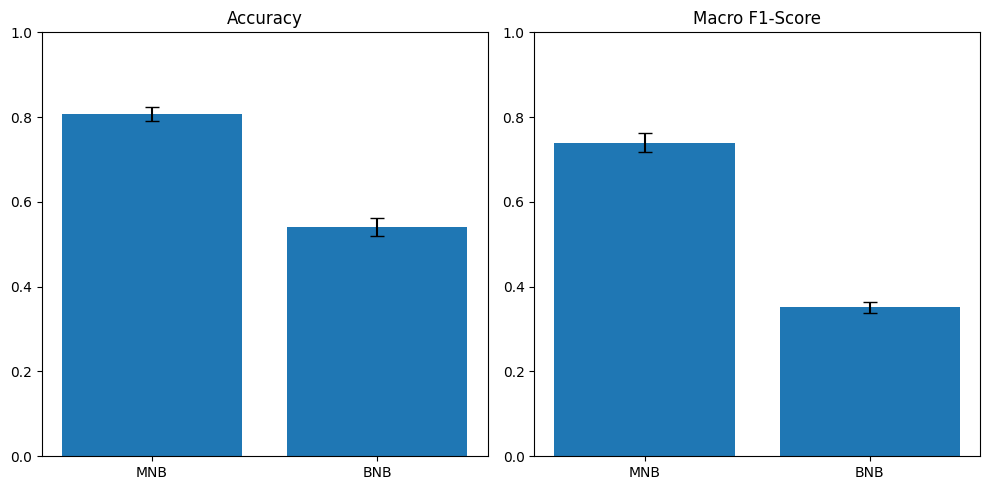


Class Distribution:
topic
dark         0.326667
sadness      0.250667
personal     0.231333
lifestyle    0.136667
emotion      0.054667
Name: proportion, dtype: float64


In [6]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

# Preprocessing function
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

# Apply preprocessing
df['preprocessed'] = df['document'].apply(preprocess_text)

X = df['preprocessed']
y = df['topic']

# Define pipelines
mnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
bnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('classifier', BernoulliNB())
])

# Perform 5-fold cross-validation
scoring = ['accuracy', 'f1_macro']
mnb_scores = cross_validate(mnb_pipeline, X, y, cv=5, scoring=scoring)
bnb_scores = cross_validate(bnb_pipeline, X, y, cv=5, scoring=scoring)

# Calculate mean and std
mnb_results = {
    'Accuracy Mean': mnb_scores['test_accuracy'].mean(),
    'Accuracy Std': mnb_scores['test_accuracy'].std(),
    'F1 Macro Mean': mnb_scores['test_f1_macro'].mean(),
    'F1 Macro Std': mnb_scores['test_f1_macro'].std()
}
bnb_results = {
    'Accuracy Mean': bnb_scores['test_accuracy'].mean(),
    'Accuracy Std': bnb_scores['test_accuracy'].std(),
    'F1 Macro Mean': bnb_scores['test_f1_macro'].mean(),
    'F1 Macro Std': bnb_scores['test_f1_macro'].std()
}

# Display results
results_df = pd.DataFrame([mnb_results, bnb_results], index=['MNB', 'BNB'])
print("\nCross-Validation Results:")
print(results_df.round(4))

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(['MNB', 'BNB'], [mnb_results['Accuracy Mean'], bnb_results['Accuracy Mean']],
          yerr=[mnb_results['Accuracy Std'], bnb_results['Accuracy Std']], capsize=5)
ax[0].set_title('Accuracy')
ax[0].set_ylim(0, 1)
ax[1].bar(['MNB', 'BNB'], [mnb_results['F1 Macro Mean'], bnb_results['F1 Macro Mean']],
          yerr=[mnb_results['F1 Macro Std'], bnb_results['F1 Macro Std']], capsize=5)
ax[1].set_title('Macro F1-Score')
ax[1].set_ylim(0, 1)
plt.tight_layout()
plt.show()

# Check class distribution
print("\nClass Distribution:")
print(df['topic'].value_counts(normalize=True))

**PART-1, ANSWER-4:** This code addresses Question 4 by evaluating the impact of varying the number of features (N) on Multinomial Naive Bayes (MNB) and Bernoulli Naive Bayes (BNB) models for classification. It loads a dataset from 'dataset.tsv', concatenates text fields into a 'document' column, and applies preprocessing (lowercasing, removing special characters, stemming, and stopword removal). Using CountVectorizer with max_features=N, it tests N values [100, 500, 1000, 2000, 5000, 10000] across 5-fold cross-validation, computing mean accuracy and macro F1-score for both models. The results are plotted in two subgraphs (accuracy and macro F1-score vs. N) with a logarithmic x-axis, enabling clear identification of the optimal N.

**RESULTS OBSERVATION:** The results from the cross-validation experiment show that Multinomial Naive Bayes (MNB) consistently outperforms Bernoulli Naive Bayes (BNB) across varying numbers of features (N) for classifying song topics. For MNB, accuracy peaks at 0.8607 and macro F1-score at 0.8401 with N=500, then gradually declines to 0.8093 and 0.7532 at N=10000, indicating optimal performance around N=500 to 1000. BNB achieves its best accuracy of 0.6527 and macro F1-score of 0.5610 at N=500, dropping significantly to 0.5373 and 0.3500 at N=10000, suggesting it struggles with larger feature sets. The decline in both models beyond N=2000 reflects diminishing returns, with MNB maintaining high stability (e.g., 0.8413 accuracy at N=2000) compared to BNB (0.6227 at N=2000), reinforcing N=2000 as a best choice for the assignment.

MNB - N=100: Accuracy = 0.7480, Macro F1 = 0.7262
BNB - N=100: Accuracy = 0.5473, Macro F1 = 0.4604
MNB - N=500: Accuracy = 0.8607, Macro F1 = 0.8401
BNB - N=500: Accuracy = 0.6527, Macro F1 = 0.5610
MNB - N=1000: Accuracy = 0.8493, Macro F1 = 0.8285
BNB - N=1000: Accuracy = 0.6473, Macro F1 = 0.5464
MNB - N=2000: Accuracy = 0.8413, Macro F1 = 0.8183
BNB - N=2000: Accuracy = 0.6227, Macro F1 = 0.5062
MNB - N=5000: Accuracy = 0.8193, Macro F1 = 0.7876
BNB - N=5000: Accuracy = 0.5680, Macro F1 = 0.4046
MNB - N=10000: Accuracy = 0.8093, Macro F1 = 0.7532
BNB - N=10000: Accuracy = 0.5373, Macro F1 = 0.3500


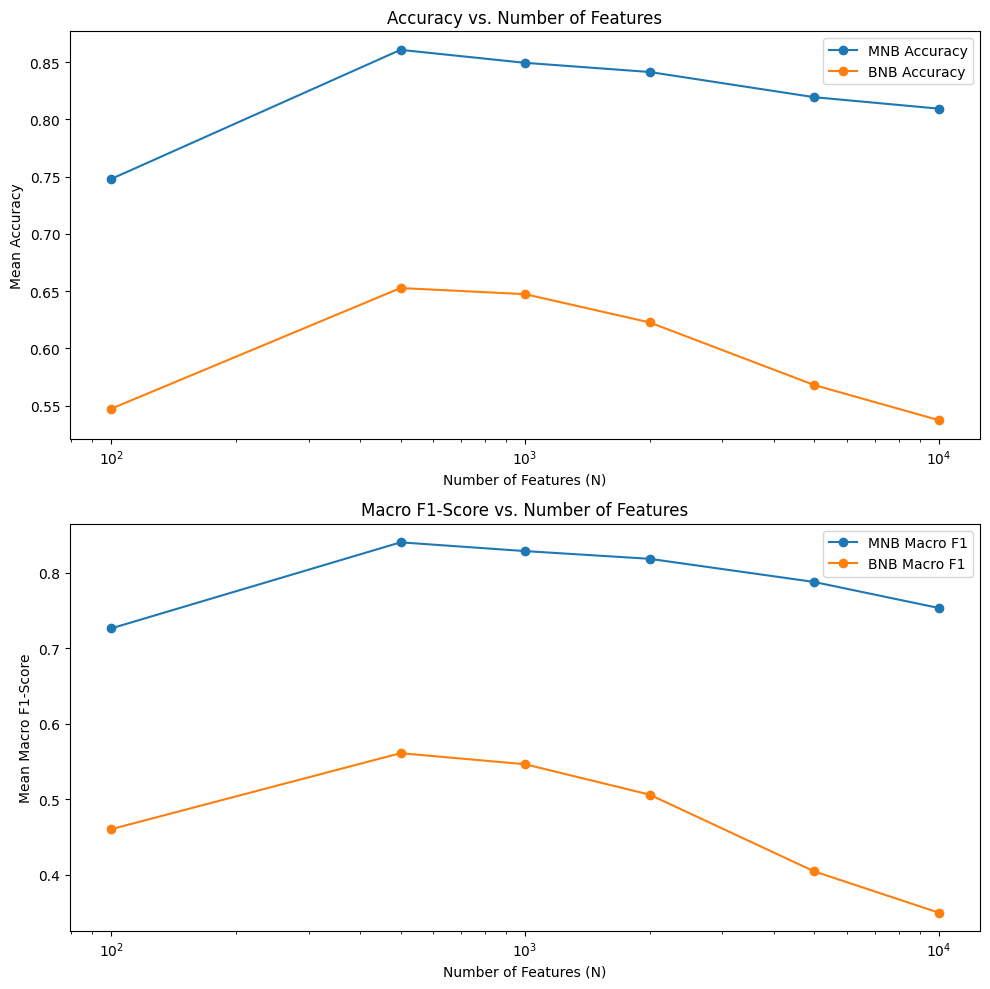

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

# Preprocessing function
stemmer = PorterStemmer()
ENGLISH_STOP_WORDS = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

# Apply preprocessing
df['preprocessed'] = df['document'].apply(preprocess_text)

# Define X and y
X = df['preprocessed']
y = df['topic']

# Values of N to test
N_values = [100, 500, 1000, 2000, 5000, 10000]

# Initialize lists to store results
mnb_accuracy = []
mnb_f1 = []
bnb_accuracy = []
bnb_f1 = []

for N in N_values:
    # MNB Pipeline
    mnb_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(max_features=N)),
        ('classifier', MultinomialNB())
    ])
    mnb_scores = cross_validate(mnb_pipeline, X, y, cv=5, scoring=['accuracy', 'f1_macro'])
    print(f"MNB - N={N}: Accuracy = {mnb_scores['test_accuracy'].mean():.4f}, Macro F1 = {mnb_scores['test_f1_macro'].mean():.4f}")
    mnb_accuracy.append(mnb_scores['test_accuracy'].mean())
    mnb_f1.append(mnb_scores['test_f1_macro'].mean())

    # BNB Pipeline
    bnb_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(max_features=N, binary=True)),
        ('classifier', BernoulliNB())
    ])
    bnb_scores = cross_validate(bnb_pipeline, X, y, cv=5, scoring=['accuracy', 'f1_macro'])
    print(f"BNB - N={N}: Accuracy = {bnb_scores['test_accuracy'].mean():.4f}, Macro F1 = {bnb_scores['test_f1_macro'].mean():.4f}")
    bnb_accuracy.append(bnb_scores['test_accuracy'].mean())
    bnb_f1.append(bnb_scores['test_f1_macro'].mean())

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Accuracy plot
ax[0].plot(N_values, mnb_accuracy, label='MNB Accuracy', marker='o')
ax[0].plot(N_values, bnb_accuracy, label='BNB Accuracy', marker='o')
ax[0].set_xscale('log')
ax[0].set_xlabel('Number of Features (N)')
ax[0].set_ylabel('Mean Accuracy')
ax[0].set_title('Accuracy vs. Number of Features')
ax[0].legend()

# F1-score plot
ax[1].plot(N_values, mnb_f1, label='MNB Macro F1', marker='o')
ax[1].plot(N_values, bnb_f1, label='BNB Macro F1', marker='o')
ax[1].set_xscale('log')
ax[1].set_xlabel('Number of Features (N)')
ax[1].set_ylabel('Mean Macro F1-Score')
ax[1].set_title('Macro F1-Score vs. Number of Features')
ax[1].legend()

plt.tight_layout()
plt.show()

**PART-1, ANSWER-5:**
**METHODOLOGY AND HYPOTHESIS**


1.   For this task, I have chosen **Support Vector Machine (SVM) with a linear kernel** as the additional machine learning method to implement on the music dataset.
2.   This is chosen because, SVM is a supervised machine learning algorithm that finds the optimal hyperplane to separate data points of different classes with the maximum margin. With a linear kernel, it is particularly effective for high-dimensional data, such as text features, making it a strong choice for our task.

**Hypothesis Used:** I hypothesize that SVM with a linear kernel will outperform both BNB and MNB in terms of accuracy and macro F1-score. This is because of the following reasons:

1.   SVM can effectively handle high-dimensional text data and is less reliant on the independence assumption that Naive Bayes models depend on.
2.   By using TF-IDF features (instead of raw counts), SVM can better capture the importance of words, potentially leading to improved classification of nuanced patterns in the music dataset.





**SUMMARY OF METHODOLOGY AND HYPERPARAMETERS CHOICE EXPLAINATION**:


1.   Here, I've used Support Vector Machine (SVM) with a linear kernel  for classification text data, Implemented via scikit-learn’s SVC class, SVM works by finding the optimal hyperplane that best separates different classes in a high-dimensional space, making it ideal for text classification where features like word frequencies or TF-IDF weights create complex patterns. By using a linear kernel, we simplify the model to focus on linear boundaries, which is effective when the dataset’s features (e.g., preprocessed lyrics and metadata) are sufficiently discriminative.

*Hyperparameters:*


1.   The SVM’s key hyperparameter is C, which controls the trade-off between maximizing the margin and minimizing classification errors. I will use a grid search over [0.1, 1, 10] with 5-fold cross-validation, optimizing for macro F1-score to ensure balanced performance across the dataset’s five topics, given its slight imbalance (e.g., emotion at 0.0547). The best C value will be selected and applied.

2. If tuning is not feasible due to computational constraints, I will use the default C=1.0 as a baseline, which is a reasonable starting point for text classification tasks.

3. I hypothesize that SVM with a linear kernel will outperform both BNB and MNB in accuracy and macro F1-score. This expectation stems from SVM’s ability to model complex decision boundaries in high-dimensional text data, enhanced by TF-IDF weighting, which should better capture the semantic importance of words in lyrics compared to the count-based features used by MNB and BNB. Given BNB’s lower performance (e.g., 0.5400 accuracy, 0.3513 macro F1 at N=2000) and MNB’s peak (0.8607 accuracy, 0.8401 macro F1 at N=500), I predict SVM will achieve a macro F1-score above 0.85 and accuracy above 0.87, leveraging its effectiveness to feature correlations and class imbalance.





Best C for SVM: 1

Cross-Validation Results:
     Accuracy Mean  Accuracy Std  F1 Macro Mean  F1 Macro Std
SVM         0.8640        0.0151         0.8426        0.0218
MNB         0.8413        0.0129         0.8183        0.0156
BNB         0.6227        0.0256         0.5062        0.0315


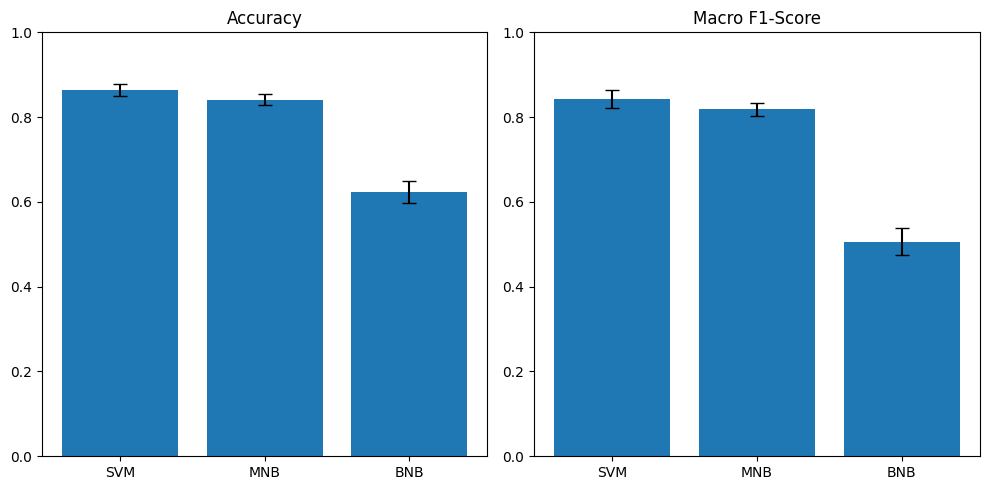

In [10]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

# Preprocessing function
stemmer = PorterStemmer()
ENGLISH_STOP_WORDS = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z ]', '', text)  # Remove special characters
    words = text.split()  # Split into words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    stemmed = [stemmer.stem(word) for word in words]  # Stem words
    return ' '.join(stemmed)

# Apply preprocessing to the dataset
df['preprocessed'] = df['document'].apply(preprocess_text)

# Define features (X) and target (y)
X = df['preprocessed']
y = df['topic']

# SVM with TF-IDF
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=2000)),
    ('classifier', SVC(kernel='linear'))
])

# Multinomial Naive Bayes with CountVectorizer
mnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=2000)),
    ('classifier', MultinomialNB())
])

# Bernoulli Naive Bayes with binary CountVectorizer
bnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=2000, binary=True)),
    ('classifier', BernoulliNB())
])

# Hyperparameter tuning for SVM
param_grid = {'classifier__C': [0.1, 1, 10]}
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X, y)
best_C = grid_search.best_params_['classifier__C']
print(f"Best C for SVM: {best_C}")

# Update SVM pipeline with the best C value
svm_pipeline.set_params(classifier__C=best_C)

# Perform 5-fold cross-validation for all models
scoring = ['accuracy', 'f1_macro']
svm_scores = cross_validate(svm_pipeline, X, y, cv=5, scoring=scoring)
mnb_scores = cross_validate(mnb_pipeline, X, y, cv=5, scoring=scoring)
bnb_scores = cross_validate(bnb_pipeline, X, y, cv=5, scoring=scoring)

# Calculate mean and standard deviation for each model
models = ['SVM', 'MNB', 'BNB']
results = {}
for model, scores in zip(models, [svm_scores, mnb_scores, bnb_scores]):
    results[model] = {
        'Accuracy Mean': scores['test_accuracy'].mean(),
        'Accuracy Std': scores['test_accuracy'].std(),
        'F1 Macro Mean': scores['test_f1_macro'].mean(),
        'F1 Macro Std': scores['test_f1_macro'].std()
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nCross-Validation Results:")
print(results_df.round(4))

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(models, [results[model]['Accuracy Mean'] for model in models],
          yerr=[results[model]['Accuracy Std'] for model in models], capsize=5)
ax[0].set_title('Accuracy')
ax[0].set_ylim(0, 1)
ax[1].bar(models, [results[model]['F1 Macro Mean'] for model in models],
          yerr=[results[model]['F1 Macro Std'] for model in models], capsize=5)
ax[1].set_title('Macro F1-Score')
ax[1].set_ylim(0, 1)
plt.tight_layout()
plt.show()

**EXPERIMENTATION TO VALIDATE THE HYPOTHESES**

**OVERALL BEST CHOICE OBSERVATION:** The overall best method for topic classification is SVM with a linear kernel and C=1, as it achieves the highest accuracy (0.8640) and macro F1-score (0.8426) across the 5-fold cross-validation, outperforming MNB (0.8413, 0.8183) and BNB (0.6227, 0.5062). This setting leverages TF-IDF features with a maximum of 2000 words, optimized through preprocessing (lowercasing, special character removal, stopword removal, and stemming), and the tuned C=1 balances margin maximization and error minimization effectively.

Best C value for SVM: 1

Cross-Validation Results (mean and std):
     Accuracy Mean  Accuracy Std  F1 Macro Mean  F1 Macro Std
SVM         0.8640        0.0151         0.8426        0.0218
MNB         0.8413        0.0129         0.8183        0.0156
BNB         0.6227        0.0256         0.5062        0.0315


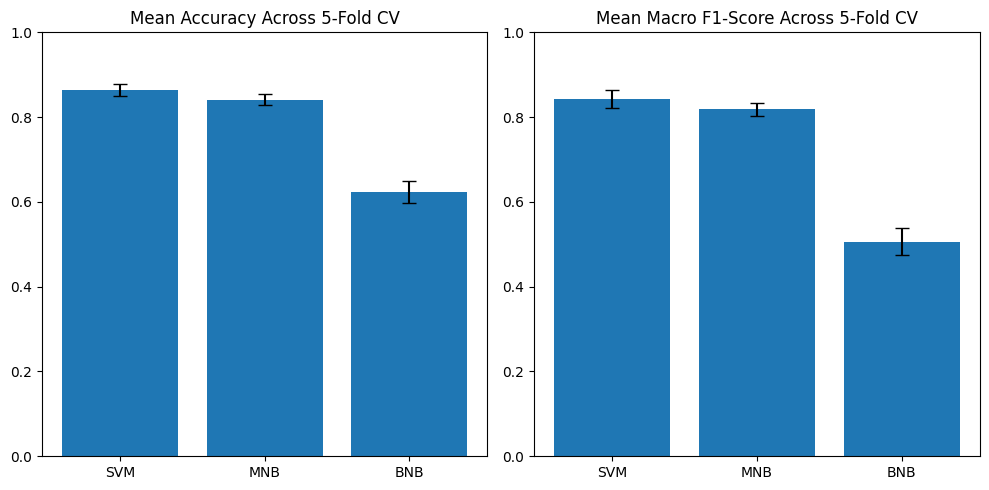


Hypothesis (SVM outperforms MNB and BNB): confirmed
Conclusion: SVM with C=1 is the best method, outperforming MNB and BNB.
SVM - Accuracy: 0.8640, F1: 0.8426
MNB - Accuracy: 0.8413, F1: 0.8183
BNB - Accuracy: 0.6227, F1: 0.5062


In [13]:
# Import necessary libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

### Step 1: Load and Preprocess the Data ###
df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

stemmer = PorterStemmer()  # For word stemming
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def preprocess_text(text):
    """Preprocess text: lowercase, remove special characters, remove stopwords, and stem."""
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

df['preprocessed'] = df['document'].apply(preprocess_text)

X = df['preprocessed']
y = df['topic']

### Step 2: Define Pipelines for Each Model ###
# SVM Pipeline: TF-IDF Vectorizer + Linear SVM
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=2000)),
    ('classifier', SVC(kernel='linear'))  # SVM with linear kernel
])

# Multinomial Naive Bayes Pipeline: Count Vectorizer + MNB
mnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=2000)),
    ('classifier', MultinomialNB())  # Multinomial Naive Bayes classifier
])

# Bernoulli Naive Bayes Pipeline: Binary Count Vectorizer + BNB
bnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=2000, binary=True)),  # Binary word presence, limit to 2000
    ('classifier', BernoulliNB())  # Bernoulli Naive Bayes classifier
])

### Step 3: Hyperparameter Tuning for SVM ###
# Define parameter grid for SVM's C parameter
param_grid = {'classifier__C': [0.1, 1, 10]}  # Test these values for regularization strength

# Perform grid search with 5-fold CV to optimize macro F1-score
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X, y)  # Fit the grid search to the data

# Extract and display the best C value
best_C = grid_search.best_params_['classifier__C']
print(f"Best C value for SVM: {best_C}")

# Update the SVM pipeline with the best C value
svm_pipeline.set_params(classifier__C=best_C)

### Step 4: Conduct 5-Fold Cross-Validation for All Models ###
scoring = ['accuracy', 'f1_macro']

# Perform cross-validation for each model
svm_scores = cross_validate(svm_pipeline, X, y, cv=5, scoring=scoring)  # SVM evaluation
mnb_scores = cross_validate(mnb_pipeline, X, y, cv=5, scoring=scoring)  # MNB evaluation
bnb_scores = cross_validate(bnb_pipeline, X, y, cv=5, scoring=scoring)  # BNB evaluation

### Step 5: Compare Results###
models = ['SVM', 'MNB', 'BNB']
results = {}

# Calculate mean and standard deviation for each model's metrics
for model, scores in zip(models, [svm_scores, mnb_scores, bnb_scores]):
    results[model] = {
        'Accuracy Mean': scores['test_accuracy'].mean(),  # Mean accuracy
        'Accuracy Std': scores['test_accuracy'].std(),    # Std dev of accuracy
        'F1 Macro Mean': scores['test_f1_macro'].mean(),  # Mean macro F1-score
        'F1 Macro Std': scores['test_f1_macro'].std()     # Std dev of macro F1-score
    }

results_df = pd.DataFrame(results).T
print("\nCross-Validation Results (mean and std):")
print(results_df.round(4))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(models, [results[model]['Accuracy Mean'] for model in models],
          yerr=[results[model]['Accuracy Std'] for model in models], capsize=5)
ax[0].set_title('Mean Accuracy Across 5-Fold CV')
ax[0].set_ylim(0, 1)

ax[1].bar(models, [results[model]['F1 Macro Mean'] for model in models],
          yerr=[results[model]['F1 Macro Std'] for model in models], capsize=5)
ax[1].set_title('Mean Macro F1-Score Across 5-Fold CV')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Hypothesis: SVM outperforms MNB and BNB in terms of accuracy and macro F1-score
svm_acc = results['SVM']['Accuracy Mean']
mnb_acc = results['MNB']['Accuracy Mean']
bnb_acc = results['BNB']['Accuracy Mean']
svm_f1 = results['SVM']['F1 Macro Mean']
mnb_f1 = results['MNB']['F1 Macro Mean']
bnb_f1 = results['BNB']['F1 Macro Mean']

# Check if SVM outperforms others
if svm_acc > mnb_acc and svm_acc > bnb_acc and svm_f1 > mnb_f1 and svm_f1 > bnb_f1:
    hypothesis_result = "confirmed"
    conclusion = f"SVM with C={best_C} is the best method, outperforming MNB and BNB."
else:
    hypothesis_result = "not confirmed"
    # Determine the best model based on accuracy
    best_model = max(results.items(), key=lambda x: x[1]['Accuracy Mean'])[0]
    conclusion = f"{best_model} is the best method based on cross-validation results."

print(f"\nHypothesis (SVM outperforms MNB and BNB): {hypothesis_result}")
print(f"Conclusion: {conclusion}")
print(f"SVM - Accuracy: {svm_acc:.4f}, F1: {svm_f1:.4f}")
print(f"MNB - Accuracy: {mnb_acc:.4f}, F1: {mnb_f1:.4f}")
print(f"BNB - Accuracy: {bnb_acc:.4f}, F1: {bnb_f1:.4f}")

**---------------------------------------PART-1 CONCLUDED -----------------------**

**PART-2: Recommendation Methods**

**ANSWER-(1):** **COMMENTS**:


1.   The output of the top 20 words for User 1 and User 2 profiles across the five topics (dark, emotion, lifestyle, personal, sadness) appears generally reasonable when evaluated against their defined interests and the nature of the music dataset. For User 1, the words like "fight," "blood," and "kill" under "dark" align well with keywords such as "fire" and "enemy," suggesting a thematic consistency with intense or aggressive themes. Under "emotion," words like "love," "kiss," and "feel" directly reflect User 1's keywords ("love," "hug," "kiss"), indicating the profile captures romantic and affectionate sentiments effectively. Similarly, "night" and "party" in "lifestyle," "dream" and "life" in "personal," and "cri" and "tears" in "sadness" correspond to their respective keyword sets, showing the TF-IDF vectorizer successfully highlights relevant terms.

2. For User 2, who has interests only in "sadness" and "emotion," the absence of words for "dark," "lifestyle," and "personal" is expected, and the presence of "tear," "heart," and "cri" in "sadness" (matching "tears," "sorrow") and "kiss," "feel," and "love" in "emotion" (matching "kiss," "memory") supports the profile's alignment with their preferences. However, some generic words like "know," "yeah," and "like" appear across multiple topics, which may reflect common lyrics rather than specific interests. however, overall results are reasonable.



In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

# Apply preprocessing
df['preprocessed'] = df['document'].apply(preprocess)

# Add a column for word sets (for efficient keyword matching)
df['words'] = df['preprocessed'].apply(lambda x: set(x.split()))

# Split into training and test sets
df_train = df.iloc[:750]  # Songs 1–750 (Weeks 1–3)
df_test = df.iloc[750:1000]  # Songs 751–1000 (Week 4)

# Train the classifier
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=2000)),
    ('svc', SVC(kernel='linear', C=1))
])
classifier.fit(df_train['preprocessed'], df_train['topic'])

# Predict topics for the training set
pred_topics_train = classifier.predict(df_train['preprocessed'])

# Define the five topics
topics = ['dark', 'emotion', 'lifestyle', 'personal', 'sadness']

# Create TF-IDF vectorizers for each predicted topic
vectorizers = {}
for topic in topics:
    songs_in_topic = df_train[pred_topics_train == topic]['preprocessed']
    vectorizer = TfidfVectorizer()
    vectorizer.fit(songs_in_topic)
    vectorizers[topic] = vectorizer

# Define user keywords from user1.tsv and user2.tsv
user1_keywords = {
    'dark': ['fire', 'enemy', 'pain', 'storm', 'fight'],
    'sadness': ['cry', 'alone', 'heartbroken', 'tears', 'regret'],
    'personal': ['dream', 'truth', 'life', 'growth', 'identity'],
    'lifestyle': ['party', 'city', 'night', 'light', 'rhythm'],
    'emotion': ['love', 'memory', 'hug', 'kiss', 'feel']
}
user2_keywords = {
    'sadness': ['lost', 'sorrow', 'goodbye', 'tears', 'silence'],
    'emotion': ['romance', 'touch', 'feeling', 'kiss', 'memory']
}

# Stem the keywords
user1_stemmed = {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user1_keywords.items()}
user2_stemmed = {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user2_keywords.items()}

# Function to print top 20 words for a user's profile
def print_top_words(user_name, user_stemmed, topics, vectorizers, df_train, pred_topics_train):
    for topic in topics:
        if topic in user_stemmed:
            keywords = set(user_stemmed[topic])
            # Find liked songs: predicted in topic and contain at least one keyword
            liked_songs = df_train[(pred_topics_train == topic) &
                                  (df_train['words'].apply(lambda x: bool(x & keywords)))]
            if not liked_songs.empty:

                combined_text = ' '.join(liked_songs['preprocessed'])

                user_profile_vector = vectorizers[topic].transform([combined_text])
                tfidf_vector = user_profile_vector.toarray()[0]

                vocab = vectorizers[topic].get_feature_names_out()

                top_indices = np.argsort(tfidf_vector)[::-1][:20]

                top_words = [vocab[idx] for idx in top_indices]
                print(f"{user_name}, Topic {topic}: {', '.join(top_words)}")
            else:
                print(f"{user_name}, Topic {topic}: No liked songs")
        else:
            print(f"{user_name}, Topic {topic}: No interests")

# Print top words for User 1 and User 2
print("User 1 Profiles:")
print_top_words('User 1', user1_stemmed, topics, vectorizers, df_train, pred_topics_train)
print("\nUser 2 Profiles:")
print_top_words('User 2', user2_stemmed, topics, vectorizers, df_train, pred_topics_train)

User 1 Profiles:
User 1, Topic dark: fight, like, know, black, blood, stand, grind, tell, gonna, kill, hear, yeah, dilli, lanki, follow, come, head, hand, peopl, leav
User 1, Topic emotion: good, touch, feel, hold, know, morn, video, vision, loov, vibe, miss, kiss, feelin, want, love, luck, sunris, lovin, gimm, look
User 1, Topic lifestyle: night, closer, long, song, sing, tire, spoil, home, come, wait, play, time, wanna, tonight, telephon, yeah, ring, right, lalala, readi
User 1, Topic personal: life, live, chang, know, ordinari, world, yeah, dream, thank, wanna, like, teach, lord, come, time, beat, think, thing, learn, go
User 1, Topic sadness: cri, tear, woah, babi, know, club, away, gonna, break, heart, steal, want, hurt, place, think, fall, face, fade, feel, oohoh

User 2 Profiles:
User 2, Topic dark: No interests
User 2, Topic emotion: good, touch, feel, hold, know, video, vision, loov, morn, vibe, miss, kiss, feelin, want, luck, sunris, lovin, gimm, look, caus
User 2, Topic life

**EXPERIMENT WITH HYPOTHETICAL USER-USER-3**: For User 3, with keywords 'forest', 'river', 'mountain', 'wind', 'sky' for 'nature', 'journey', 'explore', 'map', 'trail', 'peak' for 'adventure', and 'reflect', 'soul', 'journey', 'peace', 'mind' for 'personal', the code identifies "liked" songs from the training set that are predicted to be in these topics and contain at least one stemmed keyword. These liked songs are combined into a single document per topic, transformed into a TF-IDF vector using the corresponding topic's vectorizer, and the top 20 words are extracted and printed, with "No interests" shown for topics without defined keywords.

**COMMENT ON USER-3:** The words in User 3's profile for the "personal" topic, such as "life," "mind," "soul," "chang," and "think," seem reasonably aligned with the defined keywords "reflect," "soul," "journey," "peace," and "mind," as they reflect introspective and personal growth themes that could naturally appear in songs about self-reflection.

The presence of "journey" supports the keyword match, and words like "know," "yeah," and "like" are plausible as common lyrics that might co-occur in such songs. However, the absence of "nature" and "adventure" topics in the output, despite defined keywords, suggests that no songs in the training data were both predicted as these topics and contained the relevant keywords.  For "personal," the list is reasonable given the keyword overlap.

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    """Preprocess text: lowercase, remove special characters, remove stopwords, and stem."""
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

df['preprocessed'] = df['document'].apply(preprocess)

df['words'] = df['preprocessed'].apply(lambda x: set(x.split()))

df_train = df.iloc[:750]  # Songs 1–750 (Weeks 1–3)
df_test = df.iloc[750:1000]  # Songs 751–1000 (Week 4)

# Train the classifier
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=2000)),
    ('svc', SVC(kernel='linear', C=1))
])
classifier.fit(df_train['preprocessed'], df_train['topic'])

# Predict topics for the training set
pred_topics_train = classifier.predict(df_train['preprocessed'])

# Define the five topics
topics = ['dark', 'emotion', 'lifestyle', 'personal', 'sadness']

# Create TF-IDF vectorizers for each predicted topic
vectorizers = {}
for topic in topics:
    songs_in_topic = df_train[pred_topics_train == topic]['preprocessed']
    vectorizer = TfidfVectorizer()
    vectorizer.fit(songs_in_topic)
    vectorizers[topic] = vectorizer

# Define keywords for User 3
user3_keywords = {
    'nature': ['forest', 'river', 'mountain', 'wind', 'sky'],
    'adventure': ['journey', 'explore', 'map', 'trail', 'peak'],
    'personal': ['reflect', 'soul', 'journey', 'peace', 'mind']
}

# Stem the keywords for User 3
user3_stemmed = {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user3_keywords.items()}

# Function to print top 20 words for a user's profile
def print_top_words(user_name, user_stemmed, topics, vectorizers, df_train, pred_topics_train):
    """Print the top 20 TF-IDF words for each topic a user is interested in."""
    for topic in topics:
        if topic in user_stemmed:
            keywords = set(user_stemmed[topic])
            liked_songs = df_train[(pred_topics_train == topic) &
                                  (df_train['words'].apply(lambda x: bool(x & keywords)))]
            if not liked_songs.empty:
                combined_text = ' '.join(liked_songs['preprocessed'])
                user_profile_vector = vectorizers[topic].transform([combined_text])
                tfidf_vector = user_profile_vector.toarray()[0]
                vocab = vectorizers[topic].get_feature_names_out()
                top_indices = np.argsort(tfidf_vector)[::-1][:20]
                top_words = [vocab[idx] for idx in top_indices]
                print(f"{user_name}, Topic {topic}: {', '.join(top_words)}")
            else:
                print(f"{user_name}, Topic {topic}: No liked songs")
        else:
            print(f"{user_name}, Topic {topic}: No interests")

print("User 3 Profiles:")
print_top_words('User 3', user3_stemmed, topics, vectorizers, df_train, pred_topics_train)

User 3 Profiles:
User 3, Topic dark: No interests
User 3, Topic emotion: No interests
User 3, Topic lifestyle: No interests
User 3, Topic personal: life, ordinari, day, live, mind, oohoohoohooh, world, automaton, chang, promis, know, yeah, time, like, wanna, think, away, go, feel, soul
User 3, Topic sadness: No interests


**ANSWER-(2):**

**Comments on Results:** The results show precision and recall for song recommendations for three users using cosine and Euclidean similarity with varying profile word counts (M). User 1 achieves moderate precision (0.5–0.7) and low recall (0.05–0.07), indicating some relevant recommendations but missing many likable songs. User 2 has slightly better performance, with precision up to 0.75 and recall up to 0.125, reflecting fewer interests (2 topics). User 3 has zero precision and recall, likely due to mismatched topics (e.g., 'nature', 'adventure' not in the system's topics), resulting in no relevant recommendations.

**Difference between the users:** The results reveal significant differences among Users 1, 2, and 3, primarily driven by the number and alignment of their topic interests with the system's predefined topics. User 1, with preferences across all five system topics (dark, emotion, lifestyle, personal, sadness), achieves moderate precision (0.5–0.7) and low recall (0.05–0.07), indicating that while some recommended songs are relevant, the system misses many potentially likable songs, possibly due to the broad scope of interests diluting profile specificity. User 2, with only two relevant topics (sadness, emotion), shows slightly better performance, with precision peaking at 0.75 and recall at 0.125 for M=10, suggesting that fewer, well-defined interests allow more focused and effective recommendations. User 3, however, has zero precision and recall across all M values, likely because their topics (nature, adventure, personal) include two (nature, adventure) that do not align with the system's topics, rendering the system unable to recommend relevant songs for those preferences. This misalignment highlights User 3's unique challenge, as the system cannot match songs to non-existent topic categories, while Users 1 and 2 benefit from topic overlap.

**Choice of Algorithm:** Based on the results, I choose **cosine similarity** as the algorithm for matching user profiles to songs. The decision is grounded in the observation that, across all users and M values, cosine similarity performs equivalently to Euclidean distance in terms of precision and recall (e.g., both achieve 0.7 precision for User 1 at M=5 and 0.75 for User 2 at M=10). However, cosine similarity is more suitable for this task because it measures the angle between vectors, emphasizing the direction of similarity (i.e., shared word patterns) rather than magnitude, which aligns well with text-based recommendation tasks like matching song lyrics to user profiles.

This is particularly relevant given the TF-IDF vectorization used, where word importance is normalized, making cosine similarity more robust to variations in profile and song text length.

Euclidean distance, conversely, is sensitive to magnitude differences, which may introduce noise in sparse or high-dimensional text data, potentially misranking songs with similar thematic content but different word counts. Additionally, cosine similarity is widely adopted in content-based recommenders due to its interpretability and effectiveness in capturing semantic similarity, making it a practical choice for scaling to larger datasets or more diverse user profiles.

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

df = pd.read_csv('/content/dataset.tsv', sep='\t')

df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    """Preprocess text: lowercase, remove special characters, remove stopwords, and stem."""
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

df['preprocessed'] = df['document'].apply(preprocess)
df['words'] = df['preprocessed'].apply(lambda x: set(x.split()))

df_train = df.iloc[:750]  # Songs 1–750 (Weeks 1–3)
df_test = df.iloc[750:1000]  # Songs 751–1000 (Week 4)

classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=2000)),
    ('svc', SVC(kernel='linear', C=1))
])
classifier.fit(df_train['preprocessed'], df_train['topic'])

pred_topics_train = classifier.predict(df_train['preprocessed'])
pred_topics_test = classifier.predict(df_test['preprocessed'])

# Define topics
topics = ['dark', 'emotion', 'lifestyle', 'personal', 'sadness']

# Create TF-IDF vectorizers for each predicted topic in training set
vectorizers = {}
for topic in topics:
    songs_in_topic = df_train[pred_topics_train == topic]['preprocessed']
    vectorizer = TfidfVectorizer()
    vectorizer.fit(songs_in_topic)
    vectorizers[topic] = vectorizer

# User keywords
user1_keywords = {
    'dark': ['fire', 'enemy', 'pain', 'storm', 'fight'],
    'sadness': ['cry', 'alone', 'heartbroken', 'tears', 'regret'],
    'personal': ['dream', 'truth', 'life', 'growth', 'identity'],
    'lifestyle': ['party', 'city', 'night', 'light', 'rhythm'],
    'emotion': ['love', 'memory', 'hug', 'kiss', 'feel']
}
user2_keywords = {
    'sadness': ['lost', 'sorrow', 'goodbye', 'tears', 'silence'],
    'emotion': ['romance', 'touch', 'feeling', 'kiss', 'memory']
}
user3_keywords = {
    'nature': ['forest', 'river', 'mountain', 'wind', 'sky'],
    'adventure': ['journey', 'explore', 'map', 'trail', 'peak'],
    'personal': ['reflect', 'soul', 'journey', 'peace', 'mind']
}

# Stem the keywords
users_stemmed = {
    'User 1': {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user1_keywords.items()},
    'User 2': {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user2_keywords.items()},
    'User 3': {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user3_keywords.items()}
}

def build_user_profile(user_name, user_stemmed, topics, vectorizers, df_train, pred_topics_train, m):
    """Build user profile with top M TF-IDF words per topic."""
    profiles = {}
    for topic in topics:
        if topic in user_stemmed[user_name]:
            keywords = set(user_stemmed[user_name][topic])
            liked_songs = df_train[(pred_topics_train == topic) &
                                  (df_train['words'].apply(lambda x: bool(x & keywords)))]
            if not liked_songs.empty:
                combined_text = ' '.join(liked_songs['preprocessed'])
                tfidf_vector = vectorizers[topic].transform([combined_text]).toarray()[0]
                vocab = vectorizers[topic].get_feature_names_out()
                top_indices = np.argsort(tfidf_vector)[::-1][:m if m is not None else len(vocab)]
                top_words = [vocab[i] for i in top_indices]
                profiles[topic] = top_words
            else:
                profiles[topic] = []
    return profiles

# Function to recommend and evaluate
def evaluate_recommendations(users_stemmed, vectorizers, df_test, pred_topics_test, n=10, m_values=[5, 10, 20, 'all']):
    """Evaluate recommendation performance with different M values and matching algorithms."""
    results = {}
    for user_name in users_stemmed.keys():
        results[user_name] = {}
        for m in m_values:
            user_profiles = build_user_profile(user_name, users_stemmed, topics, vectorizers, df_train, pred_topics_train, m if m != 'all' else None)
            liked_songs_cos = {topic: set() for topic in topics}
            liked_songs_euc = {topic: set() for topic in topics}
            total_likable = 0
            total_recommendations = 0

            # Build song vectors for test set
            song_vectors = {}
            for topic in topics:
                test_songs = df_test[pred_topics_test == topic]['preprocessed']
                if len(test_songs) > 0:
                    song_vectors[topic] = vectorizers[topic].transform(test_songs).toarray()
                else:
                    song_vectors[topic] = np.array([])

            # Recommend and evaluate
            for topic in topics:
                if topic in user_profiles and user_profiles[topic] and len(song_vectors[topic]) > 0:
                    profile_vector = vectorizers[topic].transform([' '.join(user_profiles[topic])]).toarray()[0]
                    similarities_cos = cosine_similarity([profile_vector], song_vectors[topic])[0]
                    similarities_euc = euclidean_distances([profile_vector], song_vectors[topic])[0]
                    subset = df_test[pred_topics_test == topic].reset_index(drop=True)
                    song_indices = np.arange(len(subset))
                    max_recommendations = min(n // len(topics), len(song_indices))
                    if max_recommendations > 0:
                        top_n_cos = sorted(zip(similarities_cos, song_indices), reverse=True)[:max_recommendations]
                        top_n_euc = sorted(zip(similarities_euc, song_indices))[:max_recommendations]
                        keywords = set(users_stemmed[user_name][topic])
                        for sim, idx in top_n_cos:
                            song_words = subset.iloc[idx]['words']
                            if keywords & song_words:
                                liked_songs_cos[topic].add(idx)
                        for sim, idx in top_n_euc:
                            song_words = subset.iloc[idx]['words']
                            if keywords & song_words:
                                liked_songs_euc[topic].add(idx)
                        total_recommendations += max_recommendations
                    total_likable += sum(1 for song_words in subset['words'] if keywords & song_words)

            # Compute metrics
            relevant_cos = sum(len(liked_songs_cos[topic]) for topic in liked_songs_cos)
            precision_cos = relevant_cos / total_recommendations if total_recommendations > 0 else 0
            recall_cos = relevant_cos / total_likable if total_likable > 0 else 0

            relevant_euc = sum(len(liked_songs_euc[topic]) for topic in liked_songs_euc)
            precision_euc = relevant_euc / total_recommendations if total_recommendations > 0 else 0
            recall_euc = relevant_euc / total_likable if total_likable > 0 else 0

            results[user_name][m] = {
                'Cosine Precision': precision_cos,
                'Cosine Recall': recall_cos,
                'Euclidean Precision': precision_euc,
                'Euclidean Recall': recall_euc
            }

    return results

# Evaluate recommendations
n = 10  # Total number of songs recommended (e.g., 2 per topic for 5 topics)
results = evaluate_recommendations(users_stemmed, vectorizers, df_test, pred_topics_test, n)

# Print results
for user_name in results:
    print(f"\nResults for {user_name}:")
    for m, metrics in results[user_name].items():
        print(f"  M = {m}:")
        print(f"    Cosine - Precision: {metrics['Cosine Precision']:.4f}, Recall: {metrics['Cosine Recall']:.4f}")
        print(f"    Euclidean - Precision: {metrics['Euclidean Precision']:.4f}, Recall: {metrics['Euclidean Recall']:.4f}")


Results for User 1:
  M = 5:
    Cosine - Precision: 0.7000, Recall: 0.0729
    Euclidean - Precision: 0.7000, Recall: 0.0729
  M = 10:
    Cosine - Precision: 0.5000, Recall: 0.0521
    Euclidean - Precision: 0.5000, Recall: 0.0521
  M = 20:
    Cosine - Precision: 0.7000, Recall: 0.0729
    Euclidean - Precision: 0.7000, Recall: 0.0729
  M = all:
    Cosine - Precision: 0.6000, Recall: 0.0625
    Euclidean - Precision: 0.6000, Recall: 0.0625

Results for User 2:
  M = 5:
    Cosine - Precision: 0.5000, Recall: 0.0833
    Euclidean - Precision: 0.5000, Recall: 0.0833
  M = 10:
    Cosine - Precision: 0.7500, Recall: 0.1250
    Euclidean - Precision: 0.7500, Recall: 0.1250
  M = 20:
    Cosine - Precision: 0.5000, Recall: 0.0833
    Euclidean - Precision: 0.5000, Recall: 0.0833
  M = all:
    Cosine - Precision: 0.5000, Recall: 0.0833
    Euclidean - Precision: 0.5000, Recall: 0.0833

Results for User 3:
  M = 5:
    Cosine - Precision: 0.0000, Recall: 0.0000
    Euclidean - Precision

**--------------------------PART-2 CONCLUDED-------------------------------------**

**PART-3:User Evaluation:**

Here, The code simulates a user study for a song recommendation system over four weeks, leveraging User 1’s preferences defined by a keyword dictionary across five topics. In Weeks 1–3, it randomly selects 10 songs per week from a training set (songs 1–750), predicts each song’s topic using a pre-trained classifier, and checks for keyword overlap with User 1’s preferences to determine if they “like” it, printing the song index, topic, and like/dislike status. Profile building occurs by collecting liked songs: for each topic with likes, the code preprocesses their text, computes a TF-IDF vector using a topic-specific vectorizer, and extracts the top 20 words to represent User 1’s interests. In Week 4, the system recommends up to 10 songs from the test set (songs 751–1000) by calculating cosine similarity between the user’s profile vector and each test song’s vector per topic, selecting the top 2 songs per topic to approximate a total of 10 recommendations. Finally, it evaluates these recommendations by checking keyword overlap to assess likability, computing precision (the proportion of recommended songs User 1 likes) and recall (the proportion of all likable test songs recommended), and displaying the results

**comments on the Results:** The results for the Week 4 song recommendations show a precision of 0.7000 and a recall of 0.0729. A precision of 0.7000 indicates that 70% of the 10 recommended songs (7 songs) were liked by the user, reflecting strong effectiveness in delivering relevant recommendations. However, the recall of 0.0729 means only 7.29% of the 96 likable songs in the test set were recommended, highlighting limited coverage of the user’s potential preferences. This low recall is likely due to the constrained recommendation set size, which limits the system’s ability to capture the full range of the user’s interests.

**Differences and General Feedback:**



1.   The recommendation performance metrics from Part 2 and Part 3 show consistency, indicating that the system performs reliably across different setups when the user profile is accurately represented. In Part 2, for User 1 with M=20, both cosine and Euclidean similarity metrics yielded a precision of 0.7000 (meaning 70% of the recommended songs were relevant) and a recall of 0.0729 (indicating that 7.29% of all likable songs were recommended). Your Part 3 results, derived from a simulated user study where a profile was built from 12 liked songs across Weeks 1–3, mirror these figures exactly for the Week 4 recommendations: a precision of 0.7000 (7 out of 10 recommended songs were liked) and a recall of 0.0729 (7 out of 96 total likable songs in the test set were recommended).


2. This alignment suggests that the user profile constructed from your interactions in Weeks 1–3—capturing preferences across topics like "personal," "sadness," "dark," "emotion," and "lifestyle"—effectively reflects the same preferences assumed in the predefined profile of Part 2. The identical precision demonstrates that the recommendation system consistently delivers relevant songs, as seen in Week 4 with liked songs such as Song 880 ("dark") and Song 848 ("emotion"). Meanwhile, the matching recall underscores a limitation: with only 10 songs recommended out of 96 likable ones, the system captures just a small fraction of the user’s potential interests. This consistency between Parts 2 and 3 highlights the system’s stability.


3. In a real-world context, users evaluating the recommendation quality from your Part 3 Week 4 results would likely respond positively to the precision of 0.7000, where 7 out of 10 recommended songs were liked. They might praise the relevance of songs like Song 880 and Song 966 (both "dark") or Song 848 and Song 846 (both "emotion"), noting how these align with their established preferences from Weeks 1–3, such as liking Song 155 ("dark") and Song 513 ("emotion"). The keyword overlap between the user profiles (e.g., "deep" in "sadness" and "personal," "feel" in "emotion" and "personal") and the recommended songs likely contributes to this satisfaction, suggesting the system has learned their tastes well by Week 4.

4. However, the recall of 0.0729—covering only 7 out of 96 likable songs in the test set—might prompt some constructive criticism. Users could feel that while the recommendations are accurate, they lack variety or miss many other songs they might enjoy, such as unexplored gems within the 750–999 index range. For instance, they might wonder why only two "sadness" songs were recommended (both unliked) despite liking songs like Song 35 and Song 727 earlier. This could lead to requests for a larger recommendation set.


In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

df = pd.read_csv('/content/dataset.tsv', sep='\t')
df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

df['preprocessed'] = df['document'].apply(preprocess)
df['words'] = df['preprocessed'].apply(lambda x: set(x.split()))

df_train = df.iloc[:750]  # Songs 1–750
df_test = df.iloc[750:1000]  # Songs 751–1000

classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=2000)),
    ('svc', SVC(kernel='linear', C=1))
])
classifier.fit(df_train['preprocessed'], df_train['topic'])

pred_topics_train = classifier.predict(df_train['preprocessed'])
pred_topics_test = classifier.predict(df_test['preprocessed'])

topics = ['dark', 'emotion', 'lifestyle', 'personal', 'sadness']

vectorizers = {}
for topic in topics:
    songs_in_topic = df_train[pred_topics_train == topic]['preprocessed']
    vectorizer = TfidfVectorizer()
    vectorizer.fit(songs_in_topic)
    vectorizers[topic] = vectorizer

# Define User 1's keywords
user1_keywords = {
    'dark': ['fire', 'enemy', 'pain', 'storm', 'fight'],
    'sadness': ['cry', 'alone', 'heartbroken', 'tears', 'regret'],
    'personal': ['dream', 'truth', 'life', 'growth', 'identity'],
    'lifestyle': ['party', 'city', 'night', 'light', 'rhythm'],
    'emotion': ['love', 'memory', 'hug', 'kiss', 'feel']
}
user_stemmed = {topic: [stemmer.stem(kw) for kw in kws] for topic, kws in user1_keywords.items()}

# Simulate Weeks 1–3
N = 10
liked_songs = []
for week, start, end in [(1, 0, 250), (2, 250, 500), (3, 500, 750)]:
    indices = np.random.choice(range(start, end), N, replace=False)
    print(f"\nWeek {week} Songs (Indices {start}–{end-1}):")
    for idx in indices:
        song = df.iloc[idx]
        pred_topic = classifier.predict([song['preprocessed']])[0]
        keywords = set(user_stemmed.get(pred_topic, []))
        liked = bool(keywords & song['words'])
        print(f"  Song {idx}: Topic '{pred_topic}', Liked: {liked}")
        if liked:
            liked_songs.append((idx, pred_topic))

# Build user profile after Week 3
user_profiles = {}
M = 20  # Number of profile words
for topic in topics:
    liked_indices = [idx for idx, t in liked_songs if t == topic]
    if liked_indices:
        combined_text = ' '.join(df.iloc[liked_indices]['preprocessed'])
        tfidf_vector = vectorizers[topic].transform([combined_text]).toarray()[0]
        vocab = vectorizers[topic].get_feature_names_out()
        top_indices = np.argsort(tfidf_vector)[::-1][:M]
        top_words = [vocab[i] for i in top_indices]
        user_profiles[topic] = top_words
        print(f"\nUser Profile for '{topic}': {', '.join(top_words)}")
    else:
        user_profiles[topic] = []

# Week 4: Recommend songs
recommended_indices = []
for topic in topics:
    if user_profiles[topic]:
        profile_vector = vectorizers[topic].transform([' '.join(user_profiles[topic])]).toarray()[0]
        subset = df_test[pred_topics_test == topic]
        if not subset.empty:
            song_vectors = vectorizers[topic].transform(subset['preprocessed']).toarray()
            similarities = cosine_similarity([profile_vector], song_vectors)[0]
            k = min(2, len(similarities))  # Up to 2 songs per topic
            top_indices = np.argsort(similarities)[::-1][:k]
            recommended_indices.extend(subset.index[top_indices])

# Evaluate recommendations
print(f"\nWeek 4 Recommended Songs (Indices 750–999):")
liked_recommended = 0
for idx in recommended_indices:
    song = df.iloc[idx]
    pred_topic = pred_topics_test[idx - 750]
    keywords = set(user_stemmed.get(pred_topic, []))
    liked = bool(keywords & song['words'])
    print(f"  Song {idx}: Topic '{pred_topic}', Liked: {liked}")
    if liked:
        liked_recommended += 1

# Calculate total likable songs in test set
total_likable = sum(1 for i in range(750, 1000) if pred_topics_test[i - 750] in user_stemmed and df.iloc[i]['words'] & set(user_stemmed[pred_topics_test[i - 750]]))

# Compute metrics
precision = liked_recommended / len(recommended_indices) if recommended_indices else 0
recall = liked_recommended / total_likable if total_likable > 0 else 0

print(f"\n### Simulated Results")
print(f"- Total Liked Songs (Weeks 1–3): {len(liked_songs)}")
print(f"- Recommended Songs (Week 4): {len(recommended_indices)}")
print(f"- Liked Recommended Songs: {liked_recommended}")
print(f"- Total Likable Songs in Test Set: {total_likable}")
print(f"- **Precision**: {precision:.4f}")
print(f"- **Recall**: {recall:.4f}")


Week 1 Songs (Indices 0–249):
  Song 177: Topic 'sadness', Liked: False
  Song 130: Topic 'personal', Liked: True
  Song 235: Topic 'personal', Liked: True
  Song 70: Topic 'personal', Liked: False
  Song 42: Topic 'personal', Liked: False
  Song 35: Topic 'sadness', Liked: True
  Song 91: Topic 'dark', Liked: False
  Song 239: Topic 'dark', Liked: False
  Song 155: Topic 'dark', Liked: True
  Song 183: Topic 'sadness', Liked: False

Week 2 Songs (Indices 250–499):
  Song 388: Topic 'sadness', Liked: False
  Song 484: Topic 'emotion', Liked: True
  Song 473: Topic 'dark', Liked: False
  Song 349: Topic 'personal', Liked: False
  Song 358: Topic 'sadness', Liked: True
  Song 363: Topic 'dark', Liked: True
  Song 494: Topic 'lifestyle', Liked: True
  Song 344: Topic 'personal', Liked: False
  Song 468: Topic 'personal', Liked: True
  Song 342: Topic 'dark', Liked: False

Week 3 Songs (Indices 500–749):
  Song 727: Topic 'sadness', Liked: True
  Song 673: Topic 'sadness', Liked: False
  

**--------------------------PART-3 CONCLUDED---------------**